# Lung Cancer Prediction
___
### Use Case
We have been employed as an ML Engineer in a Hospital (P-Health), upon reaching there we noticed that our company spends a lot of money and resources running tests and examinations on patients to see if they have lung cancer or not.

We have proposed that we can build a ML model that can predict the patient that have higher chances of having cancer, of course we our model won't be 100% sure if someone has or not, but we would create one that predicts if someone that has lung cancer more
___

* Type of Machine Learning Method
    * Supervised Learning
        * Classification
            * XGBoost
                * Accuracy - 
                * Recall - 0.9067 
            * XGBoost
                * Accuracy - 
                * Recall - 0.9067 
            * XGBoost
                * Accuracy - 
                * Recall - 0.9067 
            * XGBoost
                * Accuracy - 
                * Recall - 0.9067 
___
* Dataset Used
     * Data was scraped from [Kaggle](https://www.kaggle.com/datasets/nidaguler/parkinsons-data-set?select=parkinsons.names)
___

### Steps to Solve Problem
* Import Dataset
* Exploratory Data Analysis
* Feature Engineering
    * Data Cleaning
    * Missing Data Imputation
    * Feature Encoding
* Model Build
    * Train / Test Data split
    * Model Initiation and Fitting
    * Test predictions
* Model Perfromance
    * MAE
    * R^2 score
    * Case Prediction
        

## Import Dataset

In [12]:
import pandas as pd # for data manipulation
import numpy as np # for numerical analysis

# For plottling graphs
import seaborn as sns 
import matplotlib.pyplot as plt

# for saving tools
import joblib

In [13]:
# Setting Plotting Settings
%matplotlib inline
sns.set_style("darkgrid")

Import Dataset

In [14]:
cancer = pd.read_csv("survey lung cancer.csv")

In [15]:
# Checking First 5 rows of data
cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Checking basic information about the dataset

In [16]:
# checking columns in the dataset
cancer.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [17]:
# no missing data
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Data Preprocessing

Mapping the Values of 2 to Yes (1) and 1 to No (0)

In [18]:
# Let's map the 2 - Y, 1- no
mapper = {
    1 : 0,
    2 : 1
}

# extracting features that need mapping
mapped_columns = [column for column in cancer.columns if cancer[column].dtype == "int64"][1:]

# Mapping these features
for column in mapped_columns:
    cancer[column] = cancer[column].map(mapper)

Mapping Lung Cancer for Yes for 1, No for 0

In [19]:
# turn target Y- 1, n-0
mapper = {
    "NO" : 0,
    "YES" : 1
}
cancer["LUNG_CANCER"] = cancer["LUNG_CANCER"].map(mapper)

Mapping Gender for Male for 1, Female for 0

In [20]:
# turn target Y- 1, n-0
mapper = {
    "F" : 0,
    "M" : 1
}
cancer["GENDER"] = cancer["GENDER"].map(mapper)

#### Data Shuffle and Split
It is good pratice to split the dataset before preprocessing to avoid data leakage, shuffling the data adds randomness which can boost model performance

In [22]:
# Shuffling the data
cancer = cancer.sample(frac=1).copy()

In [25]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X = cancer.drop("LUNG_CANCER", axis=1) 
y = cancer["LUNG_CANCER"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

#### Missing data

There is no missing data in the features

In [27]:
# Check total of missing values
cancer.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

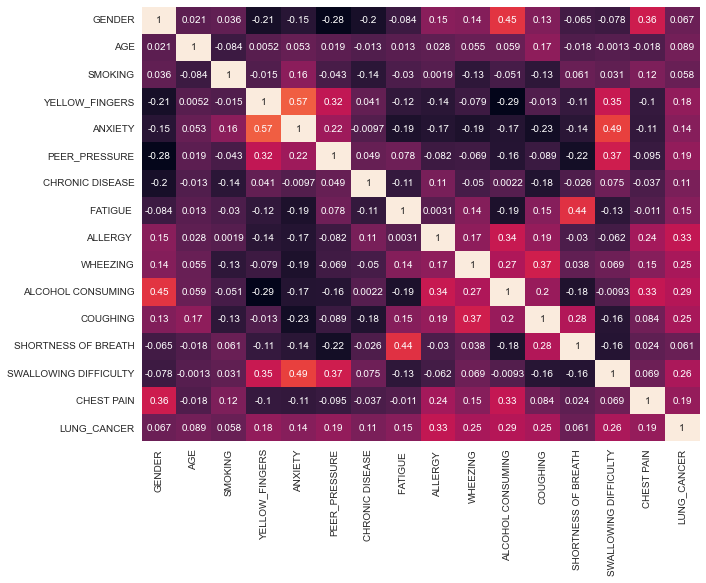

In [26]:
# Correlation
plt.figure(figsize=[10,8])
sns.heatmap(cancer.corr(), cbar=False, annot=True);

### Model Building

#### Preprocessing Test data

In [29]:
# checking first 5 rows of data
X_test.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
48,0,70,0,0,1,1,1,1,1,1,1,0,1,1,1
167,1,62,0,0,0,0,1,0,1,0,1,1,1,1,1
223,1,63,1,1,1,0,1,1,1,1,0,0,1,0,0
91,0,71,0,0,0,0,1,1,1,0,0,1,1,0,1
165,1,63,0,1,1,0,1,0,1,1,1,1,0,1,0


#### Random Forest

Import Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# bagger = RandomForestClassifier(random_state=51, n_jobs=-1, max_depth=3, max_leaf_nodes=5, max_samples=5)
bagger = RandomForestClassifier(random_state=51, n_jobs=-1)

Train model and make predictions

In [33]:
bagger.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [34]:
predictions = bagger.predict(X_test)

#### RF Performance

In [35]:
# libraries to check performance
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,  recall_score

In [36]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 95.16 %
The f1 score is 97.35 %
The recall is 100.00 %


Confusion matrix

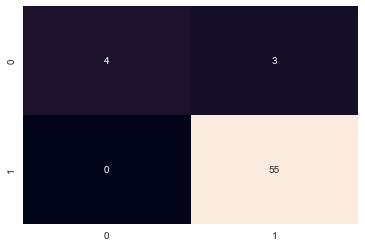

In [37]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

### SVM

Import Model

In [44]:
from sklearn.svm import SVC

In [45]:
svm = SVC()

Train model and make predictions

In [46]:
svm.fit(X_train, y_train)

SVC()

In [47]:
predictions = svm.predict(X_test)

#### SVM Performance

In [48]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 88.71 %
The f1 score is 94.02 %
The recall is 100.00 %


Confusion Matrix

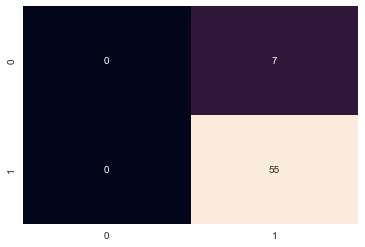

In [49]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

### KNN

Import Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model = KNeighborsClassifier()

Train model and make predictions

In [40]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
predictions = model.predict(X_test)

#### KNN Performance

In [42]:
print(f"The accuracy is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy is 91.94 %
The f1 score is 95.65 %
The recall is 100.00 %


Confusion Matrix

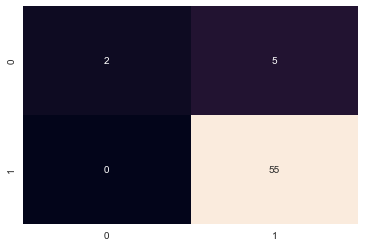

In [43]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

Saving The Model

In [51]:
# joblib.dump(bagger, "model_joblib")

['model_joblib']